In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [461]:
df = pd.read_excel("social_data.xlsx")
df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0.0,0.0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0.0,0.0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0.0,0.0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0.0,0.0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video


In [462]:
# no missing data <-- don't need to clean up dataframe
df.isnull().any()

Published Date       False
Account              False
Account Type         False
Campaign Name        False
Total Impressions    False
Total Engagements    False
Media Type           False
dtype: bool

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Published Date     3479 non-null   datetime64[ns]
 1   Account            3479 non-null   object        
 2   Account Type       3479 non-null   object        
 3   Campaign Name      3479 non-null   object        
 4   Total Impressions  3479 non-null   float64       
 5   Total Engagements  3479 non-null   float64       
 6   Media Type         3479 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 190.4+ KB


## 1) What is the typical engagement rate we can expect? What's the likelihood that we can achieve a 15% engagement rate?
Typical engagement rate we can expect is 4.202719749774868%. <br>
The likelihood that we can achieve a 15% engagement rate is 6.4961195745903995%. <br>

    # The typical engagement rate for each account type is:
            FBPAGE              11.283108%
            TIKTOK_BUSINESS      5.316753%
            TWITTER              3.248994%
            YOUTUBE              3.048881%
            LINKEDIN_COMPANY     1.795018%
            INSTAGRAM            0.666769%



In [464]:
# typical engagement rate = average engagement rate

copyDf = df

# calculate engagement rates
copyDf["Engagement Rate"] = copyDf["Total Engagements"] / copyDf["Total Impressions"] * 100

# clean up NAN with 0 -- 0/0 = NAN
copyDf.fillna(0, inplace = True)

# checking for outliers (engagement rates over 100%)
# can see that there are three outliers with engagement rates over 100%
print(copyDf.sort_values(by="Engagement Rate", ascending=False).head())



# clean up outliers of engagement rates over 100% <-- ONLY FOR CALCULATING TYPICAL ENGAGEMENT RATE
# No Outlier Dataframe
copyDf = copyDf[copyDf["Engagement Rate"] <= 100]

# print(NOcopyDf.sort_values(by="Engagement Rate", ascending=False))

# AVERAGE ENGAGEMENT RATE = 4.202719749774868%
copyDf["Engagement Rate"].mean()

              Published Date   Account Account Type Campaign Name  \
837  2023-03-10 12:37:06.000  General        FBPAGE          N/A    
3457 2023-01-05 11:55:44.000  General        FBPAGE          N/A    
3216 2023-01-19 06:02:34.000  General        FBPAGE          N/A    
1586 2023-02-23 06:18:27.000  General        FBPAGE          N/A    
2361 2023-02-09 15:00:00.377  General       TWITTER          N/A    

      Total Impressions  Total Engagements Media Type  Engagement Rate  
837                 1.0              940.0      Photo     94000.000000  
3457              300.0             3776.0      Photo      1258.666667  
3216                5.0               44.0      Photo       880.000000  
1586                1.0                1.0      Photo       100.000000  
2361               55.0               33.0       Link        60.000000  


4.202719749774868

In [465]:
# grouping by social media account, calculated the average engagement rate
# make sure to use dataframe WITHOUT outlier
accountER = copyDf.groupby(copyDf["Account Type"])["Engagement Rate"].mean()
# typical engagement rate per social media platform
accountER.sort_values(ascending = False)

Account Type
FBPAGE              11.283108
TIKTOK_BUSINESS      5.316753
TWITTER              3.248994
YOUTUBE              3.048881
LINKEDIN_COMPANY     1.795018
INSTAGRAM            0.666769
Name: Engagement Rate, dtype: float64

In [466]:
# Engagement rate = how engaged the users who saw the content were
# engagement rate = total engagements / total impressions

# include rows even if Total Imprerssions = 0 since it means the post had literally 0% engagement rate
# also INLCUDE OUTLIERS since they surpass 15% <-- using original dataframe
# rows that meet at least 15% engagement rate
engaged = df[df["Total Engagements"]/df["Total Impressions"] >= 0.15]

# length of dataframe / number of rows that have at least 15% engagement rate
prob = len(engaged) / len(newDf) * 100

# PROBABILITY OF ACHIEVING AT LEAST 15% ENGAGEMENT RATE = 6.4961195745903995%
prob

6.4961195745903995

## 2) Does day of the week and time of posting affect engagement rates?
The day of the week has no significant effect on the engagement rate. However, it shows that Tuesday, Thursday, and Sunday meet the typical engagement rate that is to be expected. <br>
<br>
Without data on how many engagements per X time after the post was made, the dataset can imply that the closer to the hour that people wake up, the higher the engagement rate a post can have. In the graph below, it shows that there is a spike in engagement rate in post(s) made between 5:30 AM - 5:59 AM. <br>
<br>
Posts published towards the end of the night (before the next day, 12 AM), have relatively lower engagement rates. This may be a result of fewer people being awake at the time. 

In [467]:
# need to exclude the outliers with engagement rate over 100% so use copyDf
dates = pd.to_datetime(copyDf["Published Date"])
copyDf["Day of Week"] = dates.dt.day_name()
copyDf

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Day of Week
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0.0,0.0,Text,0.000000,Friday
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0.0,0.0,Text,0.000000,Friday
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0.0,0.0,Text,0.000000,Friday
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0.0,0.0,Text,0.000000,Friday
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,12.766628,Friday
...,...,...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0.0,0.0,Link,0.000000,Tuesday
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0.0,0.0,Link,0.000000,Tuesday
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0.0,0.0,Link,0.000000,Tuesday
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116.0,42.0,Text,1.984877,Tuesday


In [470]:
# group by day of the week, calculate average engagement rates
dayER= copyDf.groupby([copyDf["Day of Week"]])['Engagement Rate'].mean()
print(dayER)

Day of Week
Monday       3.590710
Tuesday      5.055946
Wednesday    3.322831
Thursday     4.915714
Friday       4.195042
Saturday     3.068647
Sunday       4.297761
Name: Engagement Rate, dtype: float64


Text(0.5, 1.0, 'Engagement Rate Everyday')

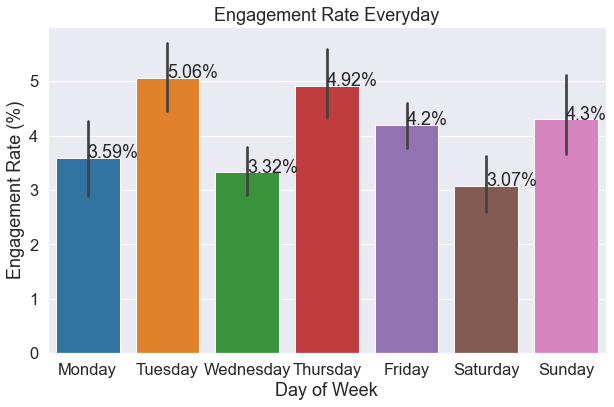

In [471]:
# use categorical to show barplot in order of Days of the Week
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekDf = copyDf
weekDf['Day of Week'] = pd.Categorical(weekDf['Day of Week'], categories=cats, ordered=True)
weekDf = weekDf.sort_values('Day of Week')

sns.set_context("notebook", font_scale = 1.5)
# Adjust the figure size to spread out the labels
plt.figure(figsize=(10, 6))

# # barplot estimator is the mean of engagment rate
ax = sns.barplot(x = "Day of Week", y = "Engagement Rate", data = weekDf)
ax.set_ylabel("Engagement Rate (%)")

for i, value in enumerate(dayER):
    plt.text(i, value, str(round(value, 2)) + '%')

plt.title("Engagement Rate Everyday")

    # Resample vs timedelta (the method I used)
    # With resample, it will round the time to the nearest 30 minutes
    # timedelta, I always floored the time to 30 minutes!

In [472]:
# to see if time has any affect on engagement rate, need to extract the TIME and ignore the date it was posted

# create 'Timestamp' column as datetime
copyDf["Timestamp"] = pd.to_datetime(copyDf["Published Date"])

# extract the time component from 'Timestamp'
copyDf['Time'] = copyDf['Timestamp'].dt.time

# convert the time component to timedelta
# convert time to minutes then floor it to get 30 minute intervals
copyDf['Time'] = copyDf['Time'].apply(lambda x: pd.to_timedelta(((x.hour * 60 + x.minute) // 30) * 30, unit='minutes'))

# group data based on the 30 minute time intervals
groupedData = copyDf.groupby('Time').mean()

# reset the index
groupedData.reset_index(inplace=True)

#CONVERTING TIME FROM: 0 days 23:30:00 TO HH:MM FORMAT
groupedData["Time"] = groupedData["Time"].apply(lambda x : str(x)[-8:-3])

# groupedData.head()

Text(0.5, 1.0, 'Engagement Rate Every 30 Minutes')

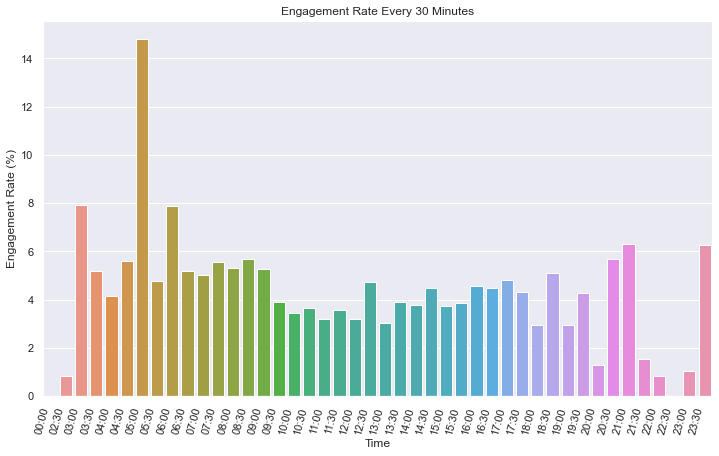

In [473]:
sns.set_context("notebook")
# adjust the figure size to spread out the labels
plt.figure(figsize=(10, 6))
# rotate the x-axis labels
plt.xticks(rotation=75, ha='right')  # rotate the labels and align them to the right
plt.tight_layout()

ax = sns.barplot(x = "Time", y = "Engagement Rate", data = groupedData)
ax.set_ylabel("Engagement Rate (%)")
plt.title("Engagement Rate Every 30 Minutes")

# 3) How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?
The game titles provided are Valorant, CSGO, and DOTA2. <br>
<br>
Social performances can be analyzed based on both total impressions and engagement rates. <br>
<br>
In terms of engagement rate, they are all similar in value, with DOTA 2 being slightly higher than the other two. However, when looking at the total impressions, Valorant is much less than CSGO and DOTA 2. Because of this, it may be better to focus more on CSGO and DOTA2 if we want to reach a larger audience on social media. If we want a specific game to expand, Valorant is the game to focus on.

    # Engagement Rate
        Account
        CSGO                3.030547
        DOTA2               4.298295
        Valorant            3.024861
    ---------------------------------
    # Total Impressions
    Account
        CSGO               2,313,918
        DOTA2              1,859,326
        Valorant              22,979
     

In [474]:
# group by the type of games first
# then see the trends for the day and times for it

# groupby type of account
accounts = copyDf.groupby("Account")

# list of dataframe
dataframes = [dataframe for account, dataframe in accounts]

for account, dataframe in accounts: 
    # GENERAL HAS DUPLICATE -- ONE IS LINKEDIN, THE OTHER IS FOR SOCIAL MEDIA
    print(account, len(account), dataframe["Account Type"].unique())

# DISCOVERED THERE ARE TWO GENERAL ACCOUNT
print(copyDf["Account"].unique())

CSGO 4 ['TWITTER']
Content Creators 16 ['YOUTUBE']
DOTA2 5 ['TWITTER' 'YOUTUBE']
General 7 ['LINKEDIN_COMPANY']
General  8 ['FBPAGE' 'TWITTER' 'INSTAGRAM' 'TIKTOK_BUSINESS' 'YOUTUBE']
Valorant 8 ['YOUTUBE']
['CSGO' 'General ' 'DOTA2' 'Content Creators' 'Valorant' 'General']


In [475]:
# replaced general with general linkedin as its only account type was LinkedIn Company
copyDf.loc[copyDf["Account"] == "General", "Account"] = "General LinkedIn"

# created dataframe to break down the type of account
acc = copyDf.groupby(["Account", "Account Type"])["Total Impressions"].sum()
acc = pd.DataFrame(acc)
acc

Total Impressions
Account          Account Type                       
CSGO             TWITTER                   2313918.0
Content Creators YOUTUBE                     45186.0
DOTA2            TWITTER                   1790811.0
                 YOUTUBE                     68515.0
General          FBPAGE                   14472842.0
                 INSTAGRAM                 3574059.0
                 TIKTOK_BUSINESS            344159.0
                 TWITTER                  15395867.0
                 YOUTUBE                    101723.0
General LinkedIn LINKEDIN_COMPANY            42801.0
Valorant         YOUTUBE                     22979.0

In [476]:
# created dataframe for Total Impressions for every Account
acc = copyDf.groupby("Account")["Total Impressions"].sum().reset_index()
acc

,Account,Total Impressions
0,CSGO,2313918.0
1,Content Creators,45186.0
2,DOTA2,1859326.0
3,General,33888650.0
4,General LinkedIn,42801.0
5,Valorant,22979.0


In [477]:
# group by account and calculate the mean engagement rate
er = copyDf.groupby("Account")["Engagement Rate"].mean()
er

Account
CSGO                3.030547
Content Creators    4.075632
DOTA2               4.298295
General             4.365911
General LinkedIn    1.795018
Valorant            3.024861
Name: Engagement Rate, dtype: float64

Text(0.5, 1.0, 'Engagement Rate per Account')

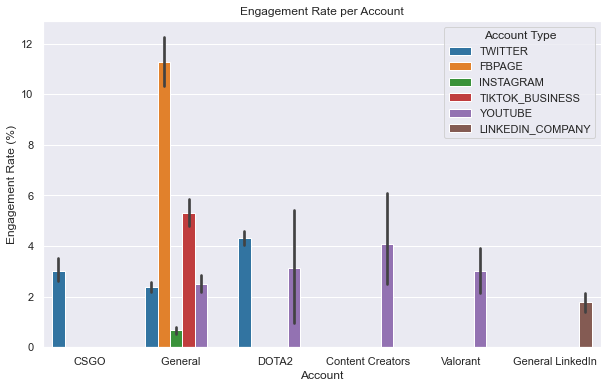

In [478]:
# I think this is better -- look for type of account - then compare the account type
copyDf["Account Type"].unique()
sns.set_context("notebook")
# Adjust the figure size to spread out the labels
plt.figure(figsize=(10, 6))
# plt.tight_layout()
ax = sns.barplot(x = "Account", y = "Engagement Rate", data = copyDf, hue = "Account Type")
sns.move_legend(ax, "upper right")
ax.set_ylabel("Engagement Rate (%)")
plt.title("Engagement Rate per Account")

## 4) What media type performs the best?
The media type that performs the best in terms of total impressions and total engagements are photos and videos. They have a significantly greater number of total impressions than the rest. Photos are interacted with much more than the other media types overall.<br>
<br>
But in terms of average engagement rate, Mixed and Album has the highest engagement rate. Although Album is ranked second for engagement rate, the number of posts is significantly less than the other types of media. Engagement rates of photos and videos may not be the highest due to the large amount of posts published and impressions. <br>

    # Total Impressions
    Media Type
        Album              20
        Carousel       160,689
        Mixed          184,984
        Link           232,465
        Text         3,106,203
        Video       10,594,813
        Photo       23,893,686
    
    # Total Engagements
    Media Type
        Album                8
        Link             2,257
        Carousel         6,541
        Mixed           13,664
        Text           246,312
        Video          859,451
        Photo        2,162,979
       
    # Engagement Rate
    Media Type
        Album       10.000000
        Carousel     3.784294
        Link         1.635631
        Mixed       10.770357
        Photo        4.941047
        Text         2.459318
        Video        4.903493

    # Value Counts
    Media Type
        Photo           1,487
        Video             967
        Text              910
        Link               94
        Carousel            9
        Mixed               5
        Album               4

In [479]:
# series for sum of total impressions based on media type
ti = copyDf.groupby("Media Type")["Total Impressions"].sum()

# graph bars are too far apart
# sns.barplot(x = "Media Type", y = "Total Impressions", data = copyDf, estimator = sum)

ti.sort_values()

Media Type
Album             20.0
Carousel      160689.0
Mixed         184984.0
Link          232465.0
Text         3106203.0
Video       10594813.0
Photo       23893686.0
Name: Total Impressions, dtype: float64

In [480]:
te = copyDf.groupby("Media Type")["Total Engagements"].sum()
te.sort_values()

Media Type
Album             8.0
Link           2257.0
Carousel       6541.0
Mixed         13664.0
Text         246312.0
Video        859451.0
Photo       2162979.0
Name: Total Engagements, dtype: float64

In [481]:
mediaER = copyDf.groupby("Media Type")["Engagement Rate"].mean()
mediaER

Media Type
Album       10.000000
Carousel     3.784294
Link         1.635631
Mixed       10.770357
Photo        4.941047
Text         2.459318
Video        4.903493
Name: Engagement Rate, dtype: float64

Text(0.5, 1.0, 'Average Engagement Rate per Media Type')

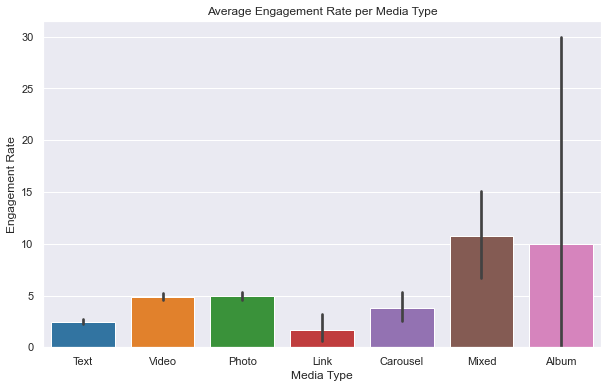

In [482]:
# Adjust the figure size to spread out the labels
plt.figure(figsize=(10, 6))

sns.barplot(x = "Media Type", y = "Engagement Rate", data = copyDf)

# I want to show the count of media types on top of bar
order = ["Video", "Photo", "Link", "Text", "Carousel", "Mixed", "Album"]
# value count in specific order of graph
values = copyDf["Media Type"].value_counts().loc[order]


# calculate average to place the count value on top of bar
avg = [copyDf[copyDf["Media Type"] == media]["Engagement Rate"].mean() for media in order]

plt.title("Average Engagement Rate per Media Type")

In [483]:
copyDf["Media Type"].value_counts()

Photo       1487
Video        967
Text         910
Link          94
Carousel       9
Mixed          5
Album          4
Name: Media Type, dtype: int64

## 5) What is our best performing campaign?
The best-performing campaign is Community Engagement with the highest total impressions and engagement rate. <br>
The heatmap made below shows that using the account type, FBPAGE, the campaign has a positive correlation to the engagement rate for most of the campaigns.
<br>

    # Total Impressions
    Campaign Name
        Community Engagement     23,803,756
        Evergreen                 1,328,729
        Evil Exhibited            5,742,595
        N/A                       7,297,780
        
    # Engagement Rate
    Campaign Name
        Community Engagement       5.634547
        Evergreen                  3.467474
        Evil Exhibited             2.681813
        N/A                        3.351382

In [484]:
print(copyDf["Campaign Name"].unique())
campaignTI = copyDf.groupby("Campaign Name")["Total Impressions"].sum()
campaignER = copyDf.groupby("Campaign Name")["Engagement Rate"].mean()
print(campaignTI)
print(campaignER)

['N/A ' 'Community Engagement ' 'Evergreen ' 'Evil Exhibited ']
Campaign Name
Community Engagement     23803756.0
Evergreen                 1328729.0
Evil Exhibited            5742595.0
N/A                       7297780.0
Name: Total Impressions, dtype: float64
Campaign Name
Community Engagement     5.634547
Evergreen                3.467474
Evil Exhibited           2.681813
N/A                      3.351382
Name: Engagement Rate, dtype: float64


In [485]:
# CER = Campaign Engagement Rate
CER = pd.pivot_table(copyDf, index = ["Account Type"], columns = ["Campaign Name"], values = "Engagement Rate")
CER

Campaign Name,Community Engagement,Evergreen,Evil Exhibited,N/A
Account Type,,,,
FBPAGE,14.505180,13.098000,3.513447,8.407131
INSTAGRAM,1.208653,1.744471,0.815349,0.100795
LINKEDIN_COMPANY,1.860454,NaN,3.213268,0.929658
TIKTOK_BUSINESS,6.422724,4.832811,3.770242,8.659015
TWITTER,3.468913,11.770774,2.961700,3.078287
YOUTUBE,7.455909,3.653416,2.964750,2.010710


<AxesSubplot:xlabel='Campaign Name', ylabel='Account Type'>

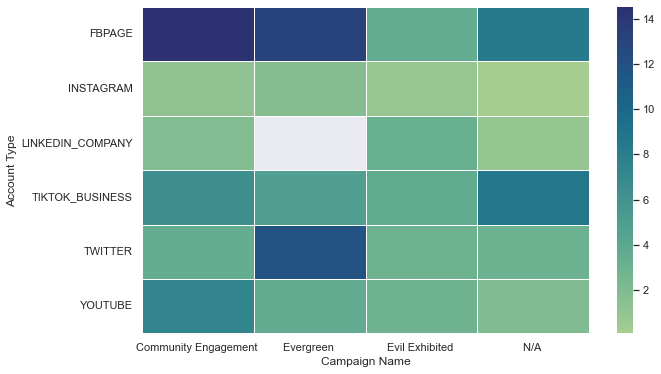

In [486]:
plt.figure(figsize=(10, 6))
sns.heatmap(CER, linecolor = "white", linewidths = 1, cmap = "crest")

## 6) Define out a posting strategy for our social channels based on your discoveries?
Based on the heatmap below, focusing on account type is a good way to decide what media type to post. For example, the strategy to post on FBPAGE is to focus on videos, photos, and albums since they have a higher engagement rate. Another example would be if we plan to post something on Instagram, publishing a media type of Carousel would be better than a text media type. <br>
Applying this strategy to each account type will hopefully lead to higher engagement rates. <br>
This strategy is focused solely on taking advantage of what media type is more engaging to the audience for each platform.

In [452]:
# MER = Media Engagement Rate
MER = pd.pivot_table(copyDf, index = ["Media Type"], columns = ["Account Type"], values = "Engagement Rate")
MER

Account Type,FBPAGE,INSTAGRAM,LINKEDIN_COMPANY,TIKTOK_BUSINESS,TWITTER,YOUTUBE
Media Type,,,,,,
Album,10.000000,NaN,NaN,NaN,NaN,NaN
Carousel,NaN,3.784294,NaN,NaN,NaN,NaN
Link,0.057891,0.000000,2.310642,NaN,2.056435,0.000000
Mixed,NaN,NaN,NaN,NaN,10.770357,NaN
Photo,13.647598,0.459752,1.934351,NaN,2.932845,NaN
Text,3.927818,0.000000,0.613156,NaN,2.689368,0.000000
Video,15.059735,1.141756,2.479645,5.316753,4.965940,3.832879


<AxesSubplot:xlabel='Account Type', ylabel='Media Type'>

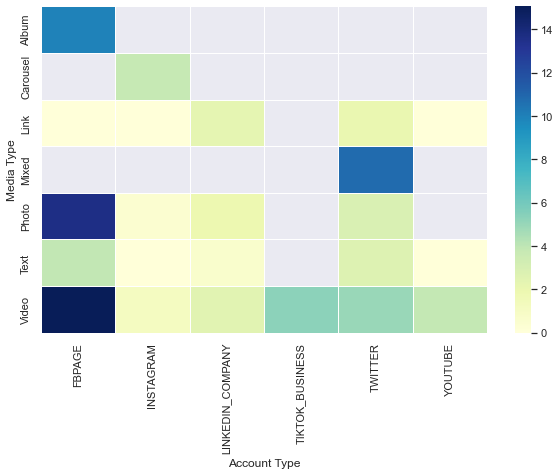

In [455]:
plt.figure(figsize=(10, 6))
sns.heatmap(MER, linecolor = "white", linewidths = 1, cmap = "YlGnBu")

## 7) What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?
I believe to expand its presence overall, every game could try expanding to Facebook as it has the largest engagement rate with an average of 11.28% rounded down. TikTok is also a good platform to expand on as it has the second-highest engagement rate. <br>
<br>
Based on the heatmap below, the engagement rate for the game Valorant and CSGO is lower than DOTA2's on both YouTube and Twitter and should look into expanding to new social media platforms such as FBPAGE and TikTok. According to the total impressions for each platform, Twitter receives the most so Valorant should also look into expanding on Twitter. <br>
<br>
I can also see that EG has only done TikTok for general accounts but not for any specific games. Expanding into TikTok for accounts that already have touched YouTube, Instagram, or Facebook would be best because they share something in common which is reels. This short interaction is very addicting and because reels already exist on YouTube, Instagram, and Facebook, expanding to TikTok would be a simple transition. So with that said, those with a DOTA2, Content Creators, or Valorant account could try to expand to TikTok. <br>
<br>
As someone who uses social media a lot, I believe expanding the general account for LinkedIn to Instagram and Facebook would be best because they are more professional than the other social media platforms.<br>
<br>
As a valorant fan myself, I believe expanding Valorant right now would be the best since Evil Geniuses team had just qualified for the largest tournaments of the year, hosted by RiotGames, Valorant Masters in Tokyo, and Valorant Champions 2023. Bringing more exposure to Evil Geniuses' Valorant team and their gameplay will vastly increase exposure to the organization as these tournaments are a big deal on a global scale! <br>

In [390]:
copyDf.groupby("Account Type")["Engagement Rate"].mean()

Account Type
FBPAGE              11.283108
INSTAGRAM            0.666769
LINKEDIN_COMPANY     1.795018
TIKTOK_BUSINESS      5.316753
TWITTER              3.248994
YOUTUBE              3.048881
Name: Engagement Rate, dtype: float64

In [397]:
copyDf.groupby("Account Type")["Total Impressions"].sum()

Account Type
FBPAGE              14472842.0
INSTAGRAM            3574059.0
LINKEDIN_COMPANY       42801.0
TIKTOK_BUSINESS       344159.0
TWITTER             19500596.0
YOUTUBE               238403.0
Name: Total Impressions, dtype: float64

In [442]:
val = copyDf[copyDf["Account"] == "Valorant"]
cs = copyDf[copyDf["Account"] == "CSGO"]
dota = copyDf[copyDf["Account"] == "DOTA2"]

# Game Engagement Rate
GER = pd.concat([val, cs, dota])
GER = pd.pivot_table(GER, index = ["Account"], columns = ["Account Type"], values = "Engagement Rate")
GER

Account Type,TWITTER,YOUTUBE
Account,,
CSGO,3.030547,NaN
DOTA2,4.310028,3.132272
Valorant,NaN,3.024861


<AxesSubplot:xlabel='Account Type', ylabel='Account'>

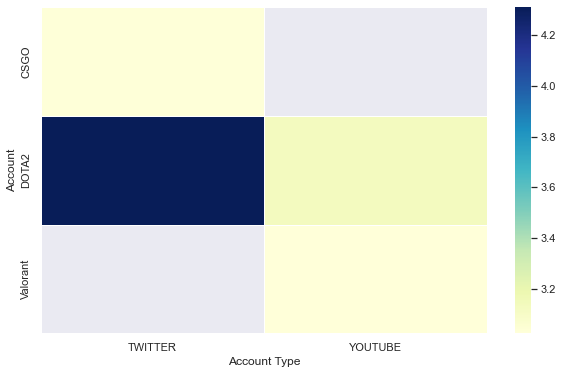

In [456]:
plt.figure(figsize=(10, 6))
sns.heatmap(GER, linecolor = "white", linewidths = 1, cmap = "YlGnBu")